iteration number=:0/5000


/home/qc/proj_py/ann.py:84: RuntimeWarning: divide by zero encountered in log
  YL=YL.reshape(YL.shape+(1,))
/home/qc/proj_py/ann.py:84: RuntimeWarning: invalid value encountered in multiply
  YL=YL.reshape(YL.shape+(1,))


iteration number=:500/5000
iteration number=:1000/5000
iteration number=:1500/5000
iteration number=:2000/5000
iteration number=:2500/5000
iteration number=:3000/5000
iteration number=:3500/5000
iteration number=:4000/5000
iteration number=:4500/5000
iteration number=:4999/5000


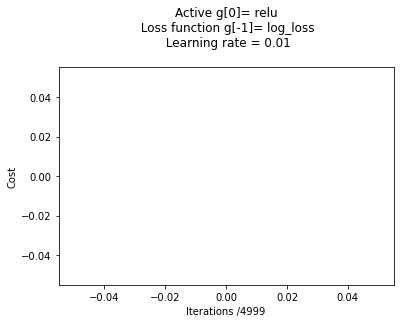

valid percent is : 88.06%


/home/qc/proj_py/ann.py:84: RuntimeWarning: divide by zero encountered in log
  YL=YL.reshape(YL.shape+(1,))
/home/qc/proj_py/ann.py:84: RuntimeWarning: invalid value encountered in multiply
  YL=YL.reshape(YL.shape+(1,))


<module 'ann' from '/home/qc/proj_py/ann.py'>

In [126]:
import ann
import imp
imp.reload(ann)

Real lab number is :	2
Precdict number is :	2


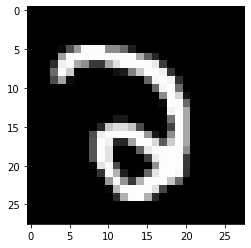

In [125]:
# ann.show(11)
ann.show()